In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [17]:
b, s, p3 = sp.symbols('b s p3')
b_values = np.arange(-1, 1.1, 0.01)
print(b_values)

[-1.0000000e+00 -9.9000000e-01 -9.8000000e-01 -9.7000000e-01
 -9.6000000e-01 -9.5000000e-01 -9.4000000e-01 -9.3000000e-01
 -9.2000000e-01 -9.1000000e-01 -9.0000000e-01 -8.9000000e-01
 -8.8000000e-01 -8.7000000e-01 -8.6000000e-01 -8.5000000e-01
 -8.4000000e-01 -8.3000000e-01 -8.2000000e-01 -8.1000000e-01
 -8.0000000e-01 -7.9000000e-01 -7.8000000e-01 -7.7000000e-01
 -7.6000000e-01 -7.5000000e-01 -7.4000000e-01 -7.3000000e-01
 -7.2000000e-01 -7.1000000e-01 -7.0000000e-01 -6.9000000e-01
 -6.8000000e-01 -6.7000000e-01 -6.6000000e-01 -6.5000000e-01
 -6.4000000e-01 -6.3000000e-01 -6.2000000e-01 -6.1000000e-01
 -6.0000000e-01 -5.9000000e-01 -5.8000000e-01 -5.7000000e-01
 -5.6000000e-01 -5.5000000e-01 -5.4000000e-01 -5.3000000e-01
 -5.2000000e-01 -5.1000000e-01 -5.0000000e-01 -4.9000000e-01
 -4.8000000e-01 -4.7000000e-01 -4.6000000e-01 -4.5000000e-01
 -4.4000000e-01 -4.3000000e-01 -4.2000000e-01 -4.1000000e-01
 -4.0000000e-01 -3.9000000e-01 -3.8000000e-01 -3.7000000e-01
 -3.6000000e-01 -3.50000

In [18]:
polynom = -13*p3**4 + (30 + 6*b)*p3**3 - (21 + 6*b + b**2 - 3*s)*p3**2 + (4 + b*s + 3*s)*p3 - s**2/4
sturm_sequence = sp.polys.polytools.sturm(polynom, p3)

print("Последний многочлен системы Штурма:")
print(sturm_sequence[-1])

# Определяем уравнение
equation1 = sturm_sequence[-1]

Последний многочлен системы Штурма:
(-8*b**11*s - 6*b**10*s**3 + 12*b**10*s**2 - 1920*b**10*s - 16*b**10 - 1428*b**9*s**3 + 1980*b**9*s**2 - 128568*b**9*s - 3792*b**9 - 656*b**8*s**4 - 92250*b**8*s**3 + 118848*b**8*s**2 - 1658640*b**8*s - 245760*b**8 - 49692*b**7*s**4 - 949194*b**7*s**3 + 6038676*b**7*s**2 - 12010824*b**7*s - 2576592*b**7 + 3912*b**6*s**5 + 3048492*b**6*s**4 - 7135218*b**6*s**3 + 70943940*b**6*s**2 - 31908744*b**6*s - 16051536*b**6 + 4239504*b**5*s**5 + 29937636*b**5*s**4 - 75297546*b**5*s**3 + 446919228*b**5*s**2 + 30543480*b**5*s - 33534000*b**5 + 1194388*b**4*s**6 - 1290924*b**4*s**5 + 164138985*b**4*s**4 - 711586026*b**4*s**3 + 1583056980*b**4*s**2 + 508090968*b**4*s - 27083808*b**4 - 46651488*b**3*s**6 - 124064568*b**3*s**5 + 298178928*b**3*s**4 - 3167185374*b**3*s**3 + 2743994556*b**3*s**2 + 1526665968*b**3*s - 7188912*b**3 - 19850064*b**2*s**7 - 421162248*b**2*s**6 - 186129036*b**2*s**5 - 456634206*b**2*s**4 - 7552646064*b**2*s**3 + 1306846224*b**2*s**2 + 206782

In [19]:
sol_1 = []
for b_val in b_values:
    solution1 = sp.solve(equation1.subs(b, b_val), s)
    real_solutions1 = [sol.evalf() for sol in solution1 if sol.is_real]
    for elem in real_solutions1:
        if elem > -1 and elem < 1 + (5+b_val)**2/24:
            sol_1.append((b_val, elem))
for elem in sol_1:
    print(elem)

(np.float64(-1.0), -0.666195536773246)
(np.float64(-1.0), -0.205128205128205)
(np.float64(-0.99), -0.664577862814899)
(np.float64(-0.99), -0.219488530314440)
(np.float64(-0.99), -0.219488392762447)
(np.float64(-0.98), -0.662965368451029)
(np.float64(-0.97), -0.661358049027272)
(np.float64(-0.96), -0.659755899645635)
(np.float64(-0.95), -0.658158915167946)
(np.float64(-0.94), -0.656567090219381)
(np.float64(-0.9299999999999999), -0.654980419191897)
(np.float64(-0.9299999999999999), -0.305703867217665)
(np.float64(-0.9299999999999999), -0.305703825090023)
(np.float64(-0.9199999999999999), -0.653398896247802)
(np.float64(-0.9099999999999999), -0.651822515323161)
(np.float64(-0.9099999999999999), -0.334462869249646)
(np.float64(-0.9099999999999999), -0.334462771775996)
(np.float64(-0.8999999999999999), -0.650251270131394)
(np.float64(-0.8999999999999999), -0.348846157400401)
(np.float64(-0.8999999999999999), -0.348846150291911)
(np.float64(-0.8899999999999999), -0.648685154166669)
(np.floa

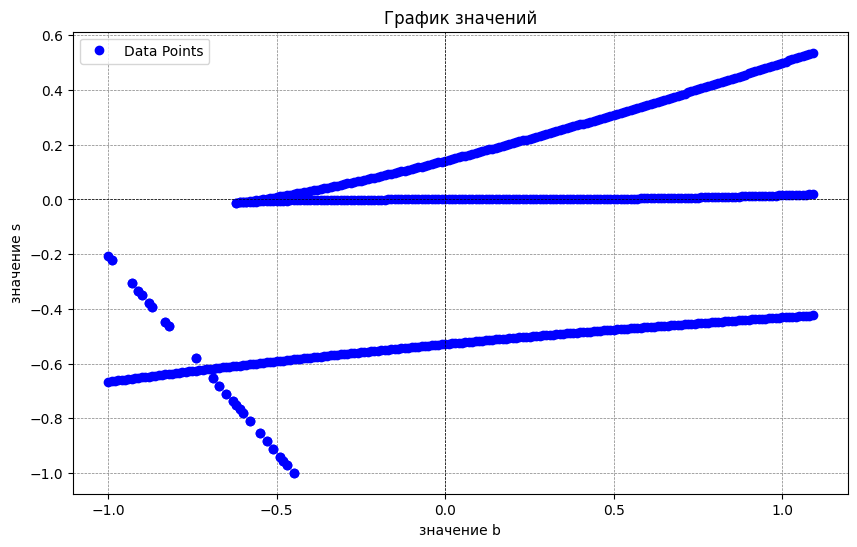

In [20]:
x, y = zip(*sol_1)  # Распаковываем кортежи в два списка

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='None', color='b', label='Data Points')

plt.title('График значений')
plt.xlabel('значение b')
plt.ylabel('значение s')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()